# 세종시 지역별 버스 승하차 데이터

In [26]:
from pandas import read_excel, DataFrame, to_datetime, date_range
from matplotlib import pyplot as plt

In [27]:
origin = read_excel("세종시지역별승차2-220101_20231106.xls", index_col='일자')
origin.head()

,행정구역,승차,하차,환승
일자,,,,
2022년01월01일,가람동,58,46,9
2022년01월01일,고운동,884,837,79
2022년01월01일,금남면,424,340,31
2022년01월01일,나성동,660,549,62
2022년01월01일,다정동,164,202,11


In [28]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15677 entries, 2022년01월01일 to 2023년10월31일
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    15677 non-null  object
 1   승차      15677 non-null  int64 
 2   하차      15677 non-null  int64 
 3   환승      15677 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 612.4+ KB


In [29]:
df = origin.copy()

In [30]:
df1 = df.query("행정구역 == '합계'")
df1.head()

,행정구역,승차,하차,환승
일자,,,,
2022년01월01일,합계,14164,11991,2319
2022년01월02일,합계,15789,14055,2684
2022년01월03일,합계,31943,27937,5222
2022년01월04일,합계,33763,29561,5544
2022년01월05일,합계,32690,28732,5281


In [31]:
df1['일자'] = to_datetime(df1.index, format='%Y년%m월%d일')
df1.head()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12440\786330850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['일자'] = to_datetime(df1.index, format='%Y년%m월%d일')


,행정구역,승차,하차,환승,일자
일자,,,,,
2022년01월01일,합계,14164,11991,2319,2022-01-01
2022년01월02일,합계,15789,14055,2684,2022-01-02
2022년01월03일,합계,31943,27937,5222,2022-01-03
2022년01월04일,합계,33763,29561,5544,2022-01-04
2022년01월05일,합계,32690,28732,5281,2022-01-05


In [32]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

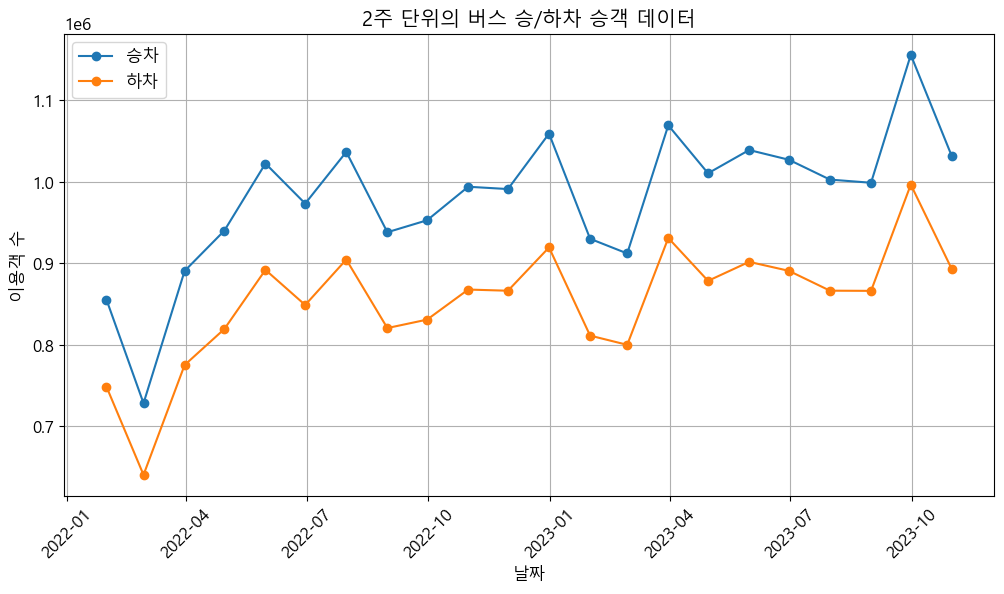

In [66]:
# Set the figure size
plt.figure(figsize=(12, 6))

df2weeks = df1.resample('1M', on='일자').sum()

plt.plot(df2weeks.index, df2weeks['승차'], label='승차', marker='o')
plt.plot(df2weeks.index, df2weeks['하차'], label='하차', marker='o')

plt.title('2주 단위의 버스 승/하차 승객 데이터')
plt.xlabel('날짜')
plt.xticks(rotation=45)
plt.ylabel('이용객 수')
# start_date = to_datetime('2021-12-20')
# end_date = to_datetime('2023-10-31')
# plt.xlim(start_date, end_date)
# plt.ylim(250000, 550000)
plt.grid(True)
plt.legend()
plt.show()